In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales = pd.read_csv("SalesData.csv")

### 1. Compare Sales by region for 2016 with 2015 using bar chart

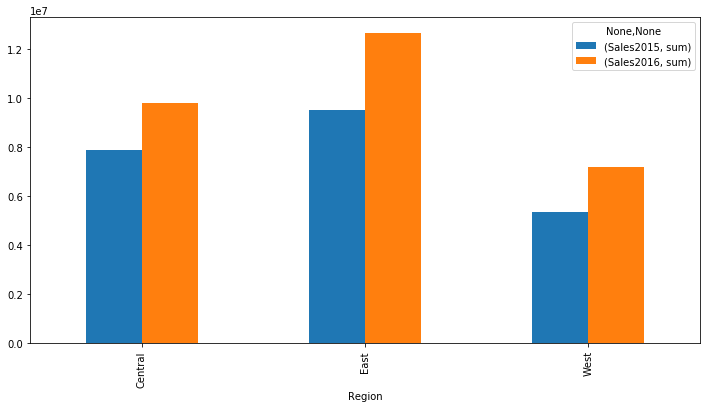

In [3]:
sales1 = sales.groupby(['Region']).agg({'Sales2015':['sum'], 'Sales2016' :['sum']})
sales1graph=sales1.plot.bar(figsize=(12,6))

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [4]:
sales2 = sales.groupby(['Region']).agg({'Sales2016' :['sum']})

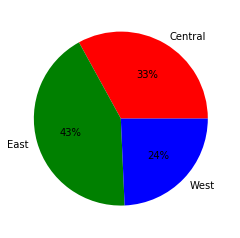

In [5]:
sales2.plot(kind='pie',  
            colors=['r', 'g', 'b'],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10, 
            legend=False,
            subplots= True)
plt.ylabel('')
plt.show()

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [6]:
sales3 = sales.groupby(['Region', 'Tier']).aggregate({'Sales2015':['sum'], 'Sales2016' :['sum']})

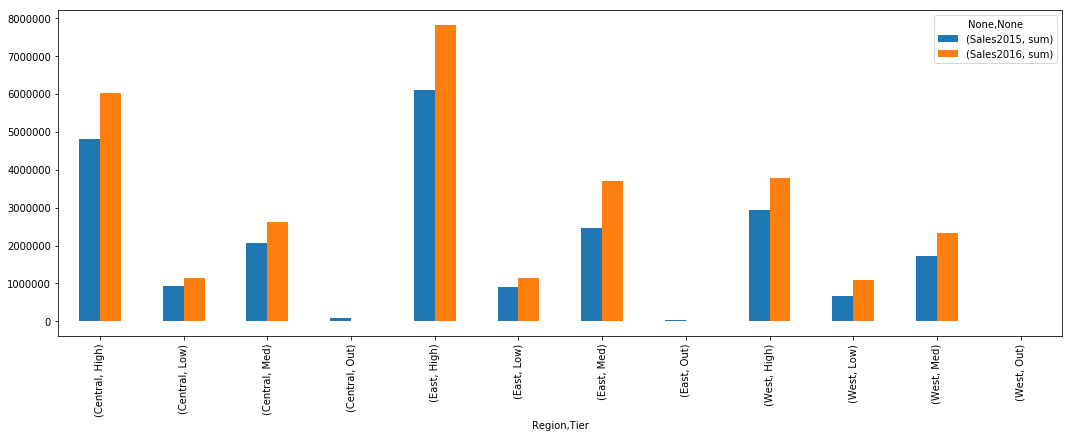

In [7]:
sales3graph=sales3.plot.bar(figsize=(18,6))

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [8]:
df = sales.where(sales['Region'] == 'East')

In [9]:
sales4 = df.groupby(['Region', 'State']).aggregate({'Sales2015':['sum'], 'Sales2016' :['sum']})

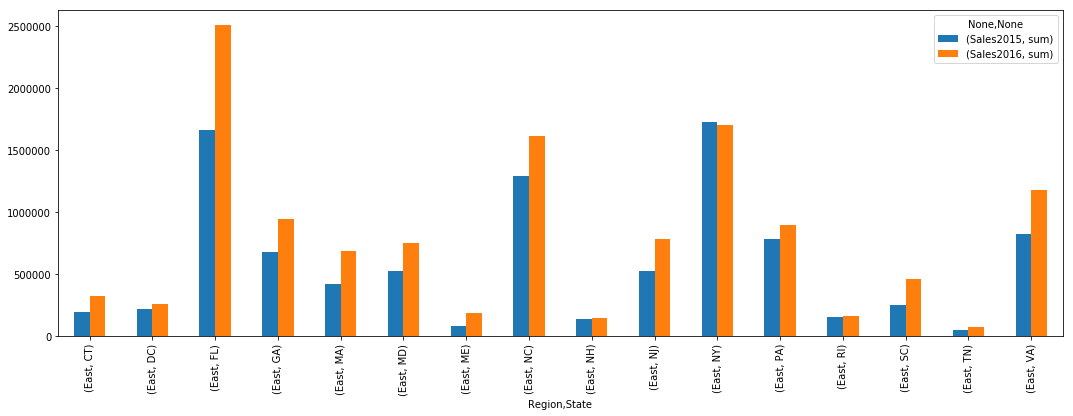

In [10]:
sales4graph=sales4.plot.bar(figsize=(18,6))

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [11]:
df1 = sales.where(sales['Tier'] == 'High')

In [12]:
sales5 = df1.groupby(['Tier', 'Division']).aggregate({'Units2015':['sum'], 'Units2016' :['sum']})

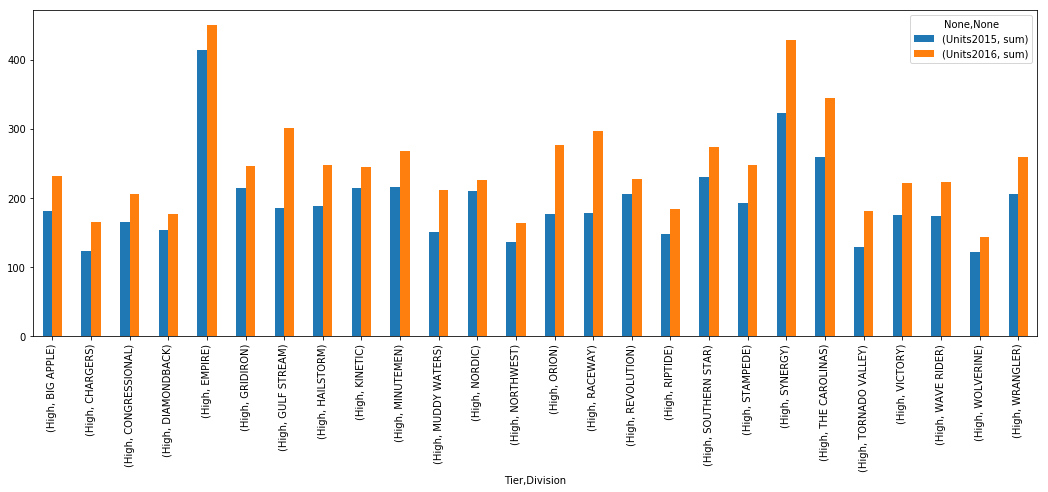

In [13]:
sales5graph=sales5.plot.bar(figsize=(18,6))

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [14]:
from numpy import where as IF

In [15]:
sales['Qtr']= IF((sales.Month == 'Jan'), 'Q1',
                 IF((sales.Month == 'Feb'), 'Q1', 
                    IF((sales.Month == 'Mar'), 'Q1',
                       IF((sales.Month == 'Apr'), 'Q2',
                          IF((sales.Month == 'May'), 'Q2',
                           IF((sales.Month == 'Jun'), 'Q2',
                            IF((sales.Month == 'Jul'), 'Q3',
                               IF((sales.Month == 'Aug'), 'Q3',
                                  IF((sales.Month == 'Sep'), 'Q3', 'Q4')))))))))

### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


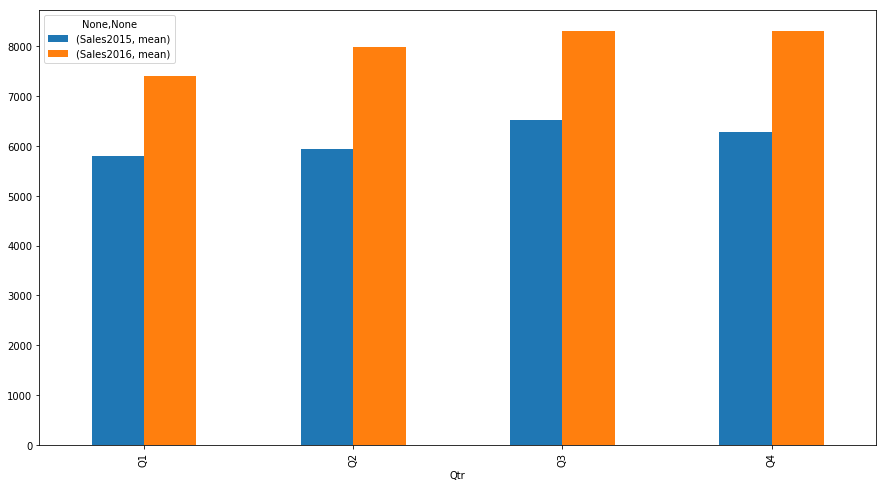

In [16]:
sales6 = sales.groupby(['Qtr']).agg({'Sales2015':['mean'], 'Sales2016' :['mean']})
sales6graph = sales6.plot.bar(figsize = (15, 8))

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [18]:
sales8 = sales[sales['Tier']!='Out']
sales8 = sales.groupby(['Qtr', 'Tier']).agg({'Sales2016': 'sum'})
sales8 = sales8.round(decimals=0)
sales8 = sales8.stack() # long to wide data
sales8 = sales8.unstack(level=0)
sales8

,Qtr,Q1,Q2,Q3,Q4
Tier,,,,,
High,Sales2016,3867719.0,4130953.0,4872559.0,4740002.0
Low,Sales2016,948833.0,890595.0,795178.0,742659.0
Med,Sales2016,2181402.0,2215814.0,2197058.0,2085207.0
Out,Sales2016,0.0,0.0,-3249.0,0.0


In [24]:
sales9 = sales8.T
sales9

Tier,High,Low,Med,Out
,Sales2016,Sales2016,Sales2016,Sales2016
Qtr,,,,
Q1,3867719.0,948833.0,2181402.0,0.0
Q2,4130953.0,890595.0,2215814.0,0.0
Q3,4872559.0,795178.0,2197058.0,-3249.0
Q4,4740002.0,742659.0,2085207.0,0.0


In [30]:
sales9=sales9.drop(['Out'], axis = 1)

In [39]:
sales9=sales9.T
sales9

,Qtr,Q1,Q2,Q3,Q4
Tier,,,,,
High,Sales2016,3867719.0,4130953.0,4872559.0,4740002.0
Low,Sales2016,948833.0,890595.0,795178.0,742659.0
Med,Sales2016,2181402.0,2215814.0,2197058.0,2085207.0


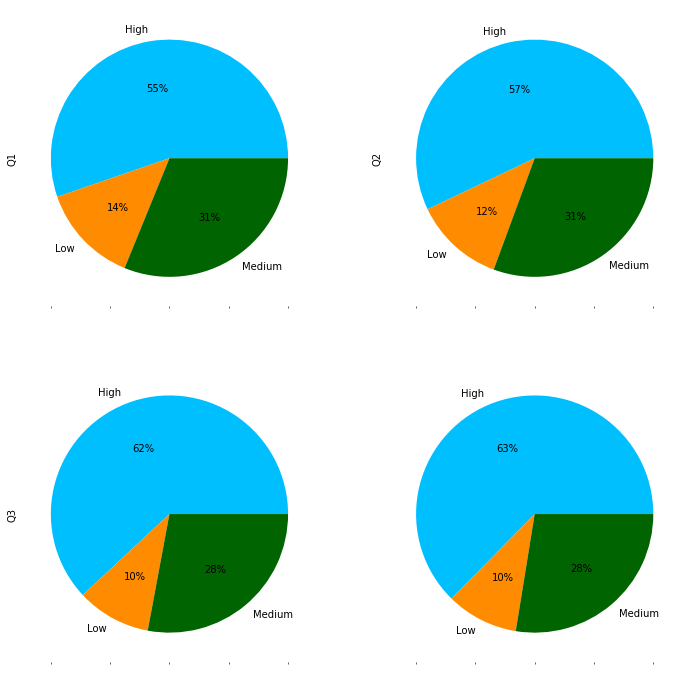

In [40]:
sales9.plot(kind='pie',  
            labels=['High', 'Low', 'Medium'], 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10, 
            legend=False,
            subplots= True,
            layout = (2,2),
            figsize=(12,12))

plt.ylabel('')
plt.show()